In [70]:

import yaml
import os
from tqdm import tqdm
from numpy import *
import luxeics
import h5py

from scipy.interpolate import interp2d,RectBivariateSpline

import matplotlib.pyplot as plt

import luxeics


def Photon_density(xoffset,yoffset,X1,X2,baseline,spotsize,sigmaT,W,path):
    
    
    Area=pi*spotsize**2

    
    selector= sqrt((xoffset+X1)**2+(yoffset+X2)**2) < spotsize


#     print ( f'IP-laser spot size: {spotsize:.2f} micron')
#     print ( f'baseline          : {baseline/1e6:.2f} metres')
#     print ('-'*42)

#     print (f'photons in spot')
#     print (f'macrophoton weight               : {amax(W):.4g}')
    
#     print ( 'macrophotons, finite source size :',sum( selector) )
    
#     print ( 'photon weight, finite source size:',sum(W[selector ] ) )
    
    
    P=sum(W[selector ] )/Area
    
#     print ( f'Photon density, finite source size:',P)
    
#     print (' ######################################### '  )
#     print ('                           '  )
#     plt.figure(figsize=(14,6))

    

#     ax1=plt.subplot(122,aspect=1)

#     # plot(X1+xoffset, X2+yoffset, color='m', marker=',',lw=0);





#     plt.scatter(X1+xoffset, X2+yoffset, color='m', marker='.',lw=0,s=W);

#     plt.xlim(-2*spotsize,2*spotsize)
#     plt.ylim(-2*spotsize,2*spotsize)
    
#     plt.xlabel(r'$x$ (micron)')
#     plt.ylabel(r'$y$ (micron)');
#     plt.title(f'Finite source size, Photon density:{round(P,2)} micron^(-2)')

    
#     ax1.add_patch(plt.Circle((0,0),spotsize,color='C0',fill=False))


#     plt.suptitle(f' sigmaT :{sigmaT} micron ; spotsize:{spotsize} micron')
#     plt.savefig(f'{path}\photon_spectrum_at_focus_{sigmaT}_{spotsize}.png',dpi=200)
    
    return(P)
                                      
    
                                   
def run(spotsize,input_filename,path):
    

    
    
    with h5py.File(input_filename + '.h5' ,'r') as ff:
    #     omega      = ff['final-state/spectrum/omega'][:]/1e9
    #     theta      = ff['final-state/spectrum/theta'][:]*1e6
    #     spectrum   = ff['final-state/spectrum/spectrum'][:]

        K0,K1,K2,K3  = ff['final-state/photon/momentum'][:].T
        X0,X1,X2,X3  = ff['final-state/photon/position'][:].T
        W            = ff['final-state/photon/weight'  ][:]

        P0,P1,P2,P3  = ff['final-state/electron/momentum'][:].T
    #     X0,X1,X2,X3  = ff['final-state/photon/position'][:].T
    #     We            = ff['final-state/photon/weight'  ][:]
    with open( input_filename + '.yml', 'r' ) as stream:
        input_dict = yaml.load(stream, Loader=yaml.SafeLoader)

        mode             = input_dict['control']['mode']


        beam_charge      = float( input_dict['beam']['beam_charge'])
        number_electrons = int( beam_charge / 1.60217653e-19)

    #     sampling         = input_dict['control']['sampling']
        sampling = mode

        w0               = float(input_dict['laser']['w0'])
        omega0           = float(input_dict['laser']['omega0'])
        gamma            = float(input_dict['beam']['gamma'])
        Xr               = 4*gamma*omega0/511*10**(-3)
        energyspread     = float(input_dict['beam']['energyspread'])
        sigmaT   = float(input_dict['beam']['sigmaT'])
#     print (f'beam charge                              : {beam_charge*1e12:.24} pC')
#     print (f'number of beam electrons                 : {number_electrons:.3e}')
#     print ('-'*42)
#     print (f'{sampling} sampling:')
#     print (f'max  single photon weight                : {amax(W):.4g}')
#     print (f'mean single photon weight                : {mean(W):.4g}')
#     print (f'total photon weight                      : {sum(W):.4g}')
#     print (f'total photon weight per incident electron: {sum(W)/number_electrons:.4g}')
#     print (f'total macro photon number                : {len(W)}')
#     print ('-'*42)
#     print(f' Frequency (Laser) :  {omega0}'  )
#     print(f'Recoil Factor:{Xr}')
#     print (' ######################################### '  )
#     print ('                           '  )
    baseline = 7.5e6

    thetax=K1/K3
    thetay=K2/K3

     

    xoffset = thetax * baseline
    yoffset = thetay * baseline
    
    Pd=Photon_density(xoffset,yoffset,X1,X2,baseline,spotsize,sigmaT,W,path)
    
    
    
    
    return(Pd)

In [71]:
 

input_filename = "Large_Beam_Full"
r=10  ####Number of runs
n=29
spotsize_Lower_Lim=2
spotsize_Upper_Lim=30
spotsize=np.linspace(spotsize_Lower_Lim,spotsize_Upper_Lim,n)

directory = "Large_Beam_Parameter_Run_Spotsize_2"
parent_dir = f"{os. getcwd()}\Photon_Density"
path = os.path.join(parent_dir, directory)
os.mkdir(path)
print(path)

"""

Saving the File in a New Folder for future reference

"""


with open( input_filename+'.yml', 'r' ) as stream:
    input_dict = yaml.load(stream, Loader=yaml.SafeLoader)
    

    
    input_dict['control']['name']=f'{path}\Large_Beam_Full'
    SigmaT=input_dict['beam']['sigmaT']
    

with open(      f'{path}\Large_Beam_Full'+'.yml', 'w') as file:
    documents = yaml.dump(input_dict, file)
    
    
"""

Running Monte-Carlo Simulations

"""




with open( f'{path}\Large_Beam_Full'+'.yml', 'r' ) as stream:
    input_dict = yaml.load(stream, Loader=yaml.SafeLoader)

print (input_dict)

Pd=np.zeros((n,r))
for j in tqdm(range(r)):

    luxeics.main_program( f'{path}\Large_Beam_Full'+'.yml' )

    
    for i in range(n):

        Pd[i,j]=run(spotsize[i],f'{path}\Large_Beam_Full',path)


C:\Users\Dupish\Documents\GitHub\luxeics\Photon_Density\Large_Beam_Parameter_Run_Spotsize_2
{'beam': {'beam_charge': '100e-12', 'emittance': 1.5, 'energyspread': '1e-3', 'gamma': 32289.62818003914, 'sigmaL': 20.0, 'sigmaT': 25.0, 'theta': 0.0}, 'control': {'beam': {'Nemit': 30, 'Nenergy': 7}, 'energyaverage': False, 'laser': {'sigma_crit': 500.0, 'sigma_rescale': False}, 'mode': 'full', 'name': 'C:\\Users\\Dupish\\Documents\\GitHub\\luxeics\\Photon_Density\\Large_Beam_Parameter_Run_Spotsize_2\\Large_Beam_Full', 'radiation': 'KN', 'sample_electrons': '1e2', 'sampling': 'rejection'}, 'detector': {'omega': ['5.0e9', '9.2e9', 300], 'pdim': 2, 'phi': 0.0, 'theta': [0, '15e-6', 110]}, 'laser': {'Tpulse': 100.0, 'a0': 0.1, 'omega0': 4.1, 'pol': 0.7853981633974483, 'pulse': 'cos2', 'w0': 25.0}}


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

>>> mode == full
[100] 100 100
 >> number_electrons   = 624150947
 >> sample_electrons   = 100
 >> electron weight    = 6.242e+06
 >> MC sampling
  > batch 0 : 100 macroelectrons
   base photon weight : 455820.12660314015
   number photons     : 1
   total photon number: 1


 10%|████████▎                                                                          | 1/10 [00:00<00:03,  2.67it/s]

>>> mode == full
[100] 100 100
 >> number_electrons   = 624150947
 >> sample_electrons   = 100
 >> electron weight    = 6.242e+06
 >> MC sampling
  > batch 0 : 100 macroelectrons
   base photon weight : 1.7592009433347437
   number photons     : 1
   total photon number: 1


 20%|████████████████▌                                                                  | 2/10 [00:00<00:02,  2.88it/s]

>>> mode == full
[100] 100 100
 >> number_electrons   = 624150947
 >> sample_electrons   = 100
 >> electron weight    = 6.242e+06
 >> MC sampling
  > batch 0 : 100 macroelectrons
   base photon weight : 1117105.2480848676
   number photons     : 1
   total photon number: 1


 30%|████████████████████████▉                                                          | 3/10 [00:00<00:02,  3.08it/s]

>>> mode == full
[100] 100 100
 >> number_electrons   = 624150947
 >> sample_electrons   = 100
 >> electron weight    = 6.242e+06
 >> MC sampling
  > batch 0 : 100 macroelectrons
   base photon weight : 58618.54114276344
   number photons     : 1
   total photon number: 1


 40%|█████████████████████████████████▏                                                 | 4/10 [00:01<00:01,  3.01it/s]

>>> mode == full
[100] 100 100
 >> number_electrons   = 624150947
 >> sample_electrons   = 100
 >> electron weight    = 6.242e+06
 >> MC sampling
  > batch 0 : 100 macroelectrons
   base photon weight : 10.369199790980364
   number photons     : 1
   total photon number: 1


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:01<00:01,  3.02it/s]

>>> mode == full
[100] 100 100
 >> number_electrons   = 624150947
 >> sample_electrons   = 100
 >> electron weight    = 6.242e+06
 >> MC sampling
  > batch 0 : 100 macroelectrons
   base photon weight : 17667.90694003502
   number photons     : 1
   total photon number: 1


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:01<00:01,  3.13it/s]

>>> mode == full
[100] 100 100
 >> number_electrons   = 624150947
 >> sample_electrons   = 100
 >> electron weight    = 6.242e+06
 >> MC sampling
  > batch 0 : 100 macroelectrons
   base photon weight : 40436.525697452475
   number photons     : 1
   total photon number: 1


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:02<00:00,  3.01it/s]

>>> mode == full
[100] 100 100
 >> number_electrons   = 624150947
 >> sample_electrons   = 100
 >> electron weight    = 6.242e+06
 >> MC sampling
  > batch 0 : 100 macroelectrons
   base photon weight : 106597.52294902387
   number photons     : 1
   total photon number: 1


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:02<00:00,  3.12it/s]

>>> mode == full
[100] 100 100
 >> number_electrons   = 624150947
 >> sample_electrons   = 100
 >> electron weight    = 6.242e+06
 >> MC sampling
  > batch 0 : 100 macroelectrons
   base photon weight : 568610.8065367156
   number photons     : 1
   total photon number: 1


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:02<00:00,  3.14it/s]

>>> mode == full
[100] 100 100
 >> number_electrons   = 624150947
 >> sample_electrons   = 100
 >> electron weight    = 6.242e+06
 >> MC sampling
  > batch 0 : 100 macroelectrons
   base photon weight : 13.590576144353202
   number photons     : 3
   total photon number: 3


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  3.00it/s]


In [26]:

"""
Zero Source Size Plot; Unphysical, therefore commented 
"""
# plt.plot(sigma,Pd[:,0],label=f'{spotsize1} microns')
# plt.plot(sigma,Pd[:,1],label=f'{spotsize2} microns')
# plt.xlabel('SigmaT [microns]')
# plt.ylabel(r'Photon Density [microns^(-2)]')
# plt.legend()
# plt.title('Zero Source Size')
# plt.savefig(f'{path}\PhotonDensity_vs_sigmaT_Zero.png',dpi=200)

'\nZero Source Size Plot; Unphysical, therefore commented \n'

In [72]:
Pd_Mean=np.ones(n)

Pd_STD=np.ones(n)
for i in range(n):

    Pd_Mean[i]=np.mean(Pd[i,:])
    Pd_STD[i]=np.std(Pd[i,:])

In [73]:
print(Pd_Mean)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00051439 0.00048067]


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Dupish\\Documents\\GitHub\\luxeics\\Photon_Density\\Large_Beam_Parameter_Run_Spotsize_2\\PhotonDensity_vs_spotsize_Finite.png'

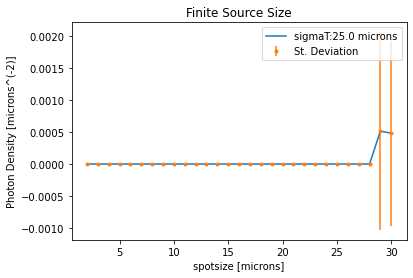

In [75]:
plt.plot(spotsize,Pd_Mean,label=f'sigmaT:{SigmaT} microns')
plt.errorbar(spotsize,Pd_Mean,Pd_STD, linestyle='None', marker='.',label='St. Deviation')
plt.xlabel('spotsize [microns]')
plt.ylabel('Photon Density [microns^(-2)]')
plt.title('Finite Source Size')
plt.legend()
plt.savefig(f'{path}\PhotonDensity_vs_spotsize_Finite.png',dpi=200)

In [65]:
import pandas as pd
import numpy as np
import os
Data=np.zeros((n,11))
Data[:,0]=spotsize
Data[:,1:11]=Pd[:,0:10]
df=pd.DataFrame(Data)

List=["Spotsize(microns)","Photon Density ","Photon Density ","Photon Density ","Photon Density ","Photon Density ","Photon Density ","Photon Density ","Photon Density ","Photon Density ","Photon Density "]
df.to_csv(f'{path}\Photon_Density.txt',header=List , index=None, sep="\t", mode='w')



print(df)

      0          1          2          3          4          5          6   \
0    2.0  12.430303  11.816453  12.527209  13.919679   9.563234  11.070080   
1    3.0   9.664804  10.458387  10.983490  11.116113   9.791636   9.641938   
2    4.0  11.722056  11.143483  10.626608  10.248063   9.790927  10.086504   
3    5.0  10.552372  10.486219   9.664166   9.696926   9.905752  10.121400   
4    6.0   9.972401  10.101348   9.696102   9.769898  10.114760  10.162947   
5    7.0  10.491405  10.232448  10.118730  10.011882  10.175312  10.338181   
6    8.0  10.564322   9.905440  10.209928   9.961511  10.314887  10.281085   
7    9.0  10.557239   9.660990  10.350444   9.815459   9.962826  10.217871   
8   10.0  10.392677   9.925153  10.517866   9.691962  10.046289  10.068570   
9   11.0  10.196822  10.281265  10.771542   9.799758   9.927501   9.970615   
10  12.0  10.126011  10.122755  10.658349   9.850847  10.024058  10.173912   
11  13.0  10.137890  10.226737  10.636120  10.059683   9.980298 

In [79]:
'''
Reading the text files
The final array p does not contain the Header files

'''
path=r"C:\Users\Dupish\Documents\GitHub\luxeics\Photon_Density\Large_Beam_Parameter_Run_Spotsize_1\Photon_Density"
print(pd.read_csv(f'{path}.txt',header=None , sep="\t"))

r=pd.read_csv(f'{path}.txt',header=0 , sep="\t")
p=pd.DataFrame.to_numpy(r)


                   0                   1                   2   \
0   Spotsize(microns)     Photon Density      Photon Density    
1                 2.0   12.43030284963063  11.816452647992278   
2                 3.0   9.664804096134423    10.4583869577447   
3                 4.0   11.72205584611253  11.143483364104485   
4                 5.0  10.552372322542423  10.486219164176534   
5                 6.0   9.972401397692893   10.10134804536336   
6                 7.0  10.491404657383763  10.232447560109025   
7                 8.0  10.564321659175503   9.905439849100713   
8                 9.0  10.557238629708205   9.660989946015889   
9                10.0  10.392676532562447   9.925152854098892   
10               11.0  10.196822107887261  10.281265176396062   
11               12.0  10.126010603053297  10.122754872037753   
12               13.0  10.137890087714819  10.226736883365867   
13               14.0   10.19653469674829   9.985521792940855   
14               15.0  10

In [83]:
print(p)

[[ 2.         12.43030285 11.81645265 12.52720913 13.91967859  9.56323397
  11.07007995 15.62312131  7.00369664  9.49569227 10.01311015]
 [ 3.          9.6648041  10.45838696 10.98349037 11.11611339  9.79163592
   9.64193752 12.93032273  9.8286341  10.36025474 10.62958125]
 [ 4.         11.72205585 11.14348336 10.62660816 10.24806262  9.79092678
  10.0865041  11.79428154 10.67223904 10.60304745 10.62126314]
 [ 5.         10.55237232 10.48621916  9.66416646  9.6969262   9.90575157
  10.12139969 11.36703276 10.7269027  10.79056041  9.84309473]
 [ 6.          9.9724014  10.10134805  9.69610193  9.76989806 10.11476047
  10.16294709 10.90761854 10.24020964 10.41288792  9.95575837]
 [ 7.         10.49140466 10.23244756 10.11873048 10.01188175 10.17531247
  10.3381807  10.5146404  11.13285142 10.32309221 10.01851686]
 [ 8.         10.56432166  9.90543985 10.20992809  9.96151081 10.31488733
  10.28108461 10.84031642 11.01314437 10.34010856 10.31878524]
 [ 9.         10.55723863  9.66098995 10.

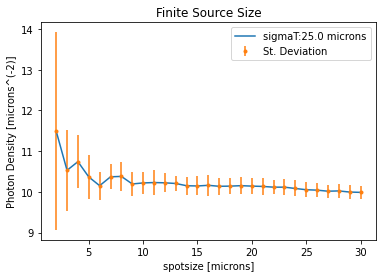

In [86]:

import os
Pd_Mean=np.ones(n)

Pd_STD=np.ones(n)
Pd=p[:,1:10]
for i in range(n):

    Pd_Mean[i]=np.mean(Pd[i,:])
    Pd_STD[i]=np.std(Pd[i,:])
    
    
plt.plot(spotsize,Pd_Mean,label=f'sigmaT:{SigmaT} microns')
plt.errorbar(spotsize,Pd_Mean,Pd_STD, linestyle='None', marker='.',label='St. Deviation')
plt.xlabel('spotsize [microns]')
plt.ylabel('Photon Density [microns^(-2)]')
plt.title('Finite Source Size')
plt.legend()
path=os.getcwd()
plt.savefig(f'{path}\PhotonDensity_vs_spotsize_Finite.png',dpi=200)